In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv('ToyotaCorolla.csv')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
data_new=data.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
data_new.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

### Checking For Multicollinearity

In [6]:
data_new.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


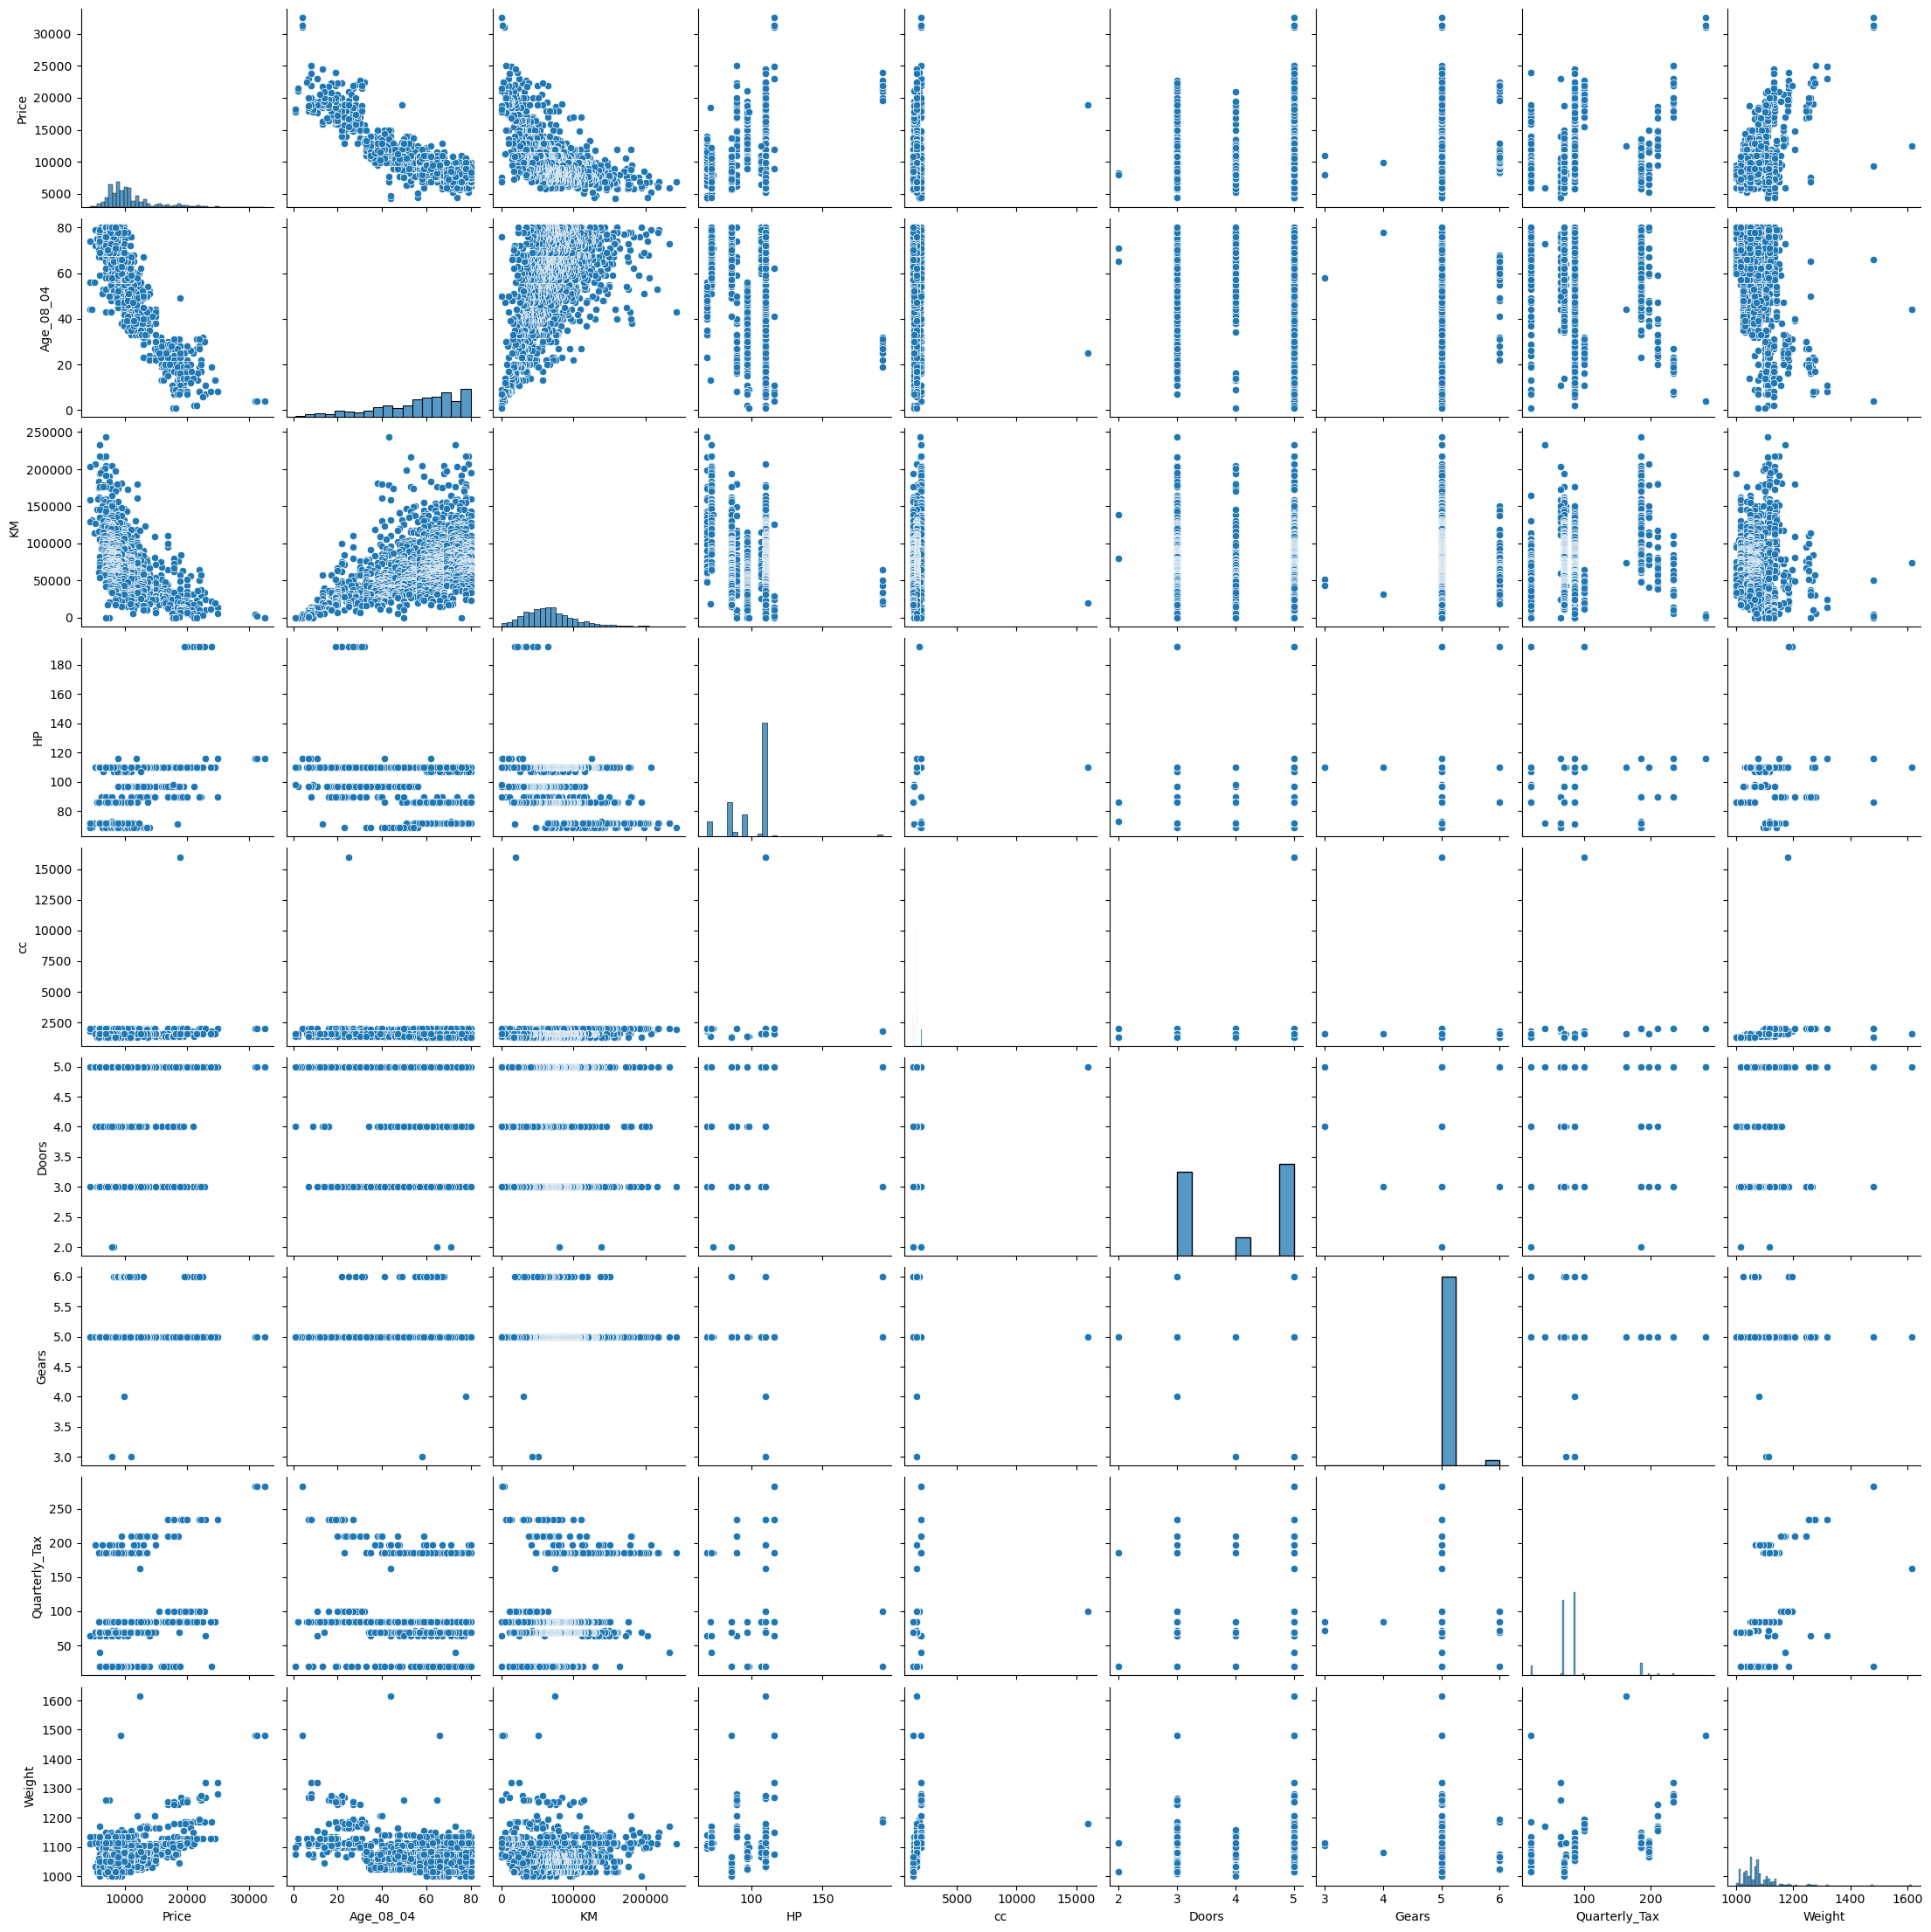

In [7]:
sns.pairplot(data_new);

## Model Building

In [8]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit()

In [9]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [10]:
model.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

In [11]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

### Building Simple Linear Regression Models

In [12]:
m_age=smf.ols('Price~Age_08_04',data=data_new).fit()

In [13]:
m_age.pvalues

Intercept    0.0
Age_08_04    0.0
dtype: float64

In [14]:
m_km=smf.ols('Price~KM',data=data_new).fit()

In [15]:
m_km.pvalues

Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64

In [16]:
m_HP=smf.ols('Price~HP',data=data_new).fit()

In [17]:
m_HP.pvalues

Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64

In [18]:
m_cc=smf.ols('Price~cc',data=data_new).fit()

In [19]:
m_cc.pvalues

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

In [20]:
m_Doors=smf.ols('Price~Doors',data=data_new).fit()

In [21]:
m_Doors.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [22]:
m_Gears=smf.ols('Price~Gears',data=data_new).fit()

In [23]:
m_Gears.pvalues

Intercept    0.069804
Gears        0.016775
dtype: float64

In [24]:
m_QT=smf.ols('Price~Quarterly_Tax',data=data_new).fit()

In [25]:
m_QT.pvalues

Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64

In [26]:
m_weight=smf.ols('Price~Weight',data=data_new).fit()

In [27]:
m_weight.pvalues

Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64

In [28]:
m_cc_doors=smf.ols('Price~cc+Doors',data=data_new).fit()

In [29]:
m_cc_doors.pvalues

Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64

In [30]:
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data_new).fit()
model1.pvalues

Intercept         8.061841e-05
Age_08_04        2.111306e-288
KM                6.123589e-57
HP                2.762121e-28
cc                1.790917e-01
Gears             2.103732e-03
Quarterly_Tax     2.512611e-03
Weight            1.612185e-55
dtype: float64

In [31]:
model2=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit()
model2.pvalues

Intercept         1.071130e-04
Age_08_04        2.556302e-288
KM                1.139394e-57
HP                8.568814e-28
Doors             9.849584e-01
Gears             2.444962e-03
Quarterly_Tax     4.142438e-03
Weight            2.532616e-52
dtype: float64

In [32]:
model3=smf.ols('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit()
model3.pvalues

Intercept         3.195287e-43
KM               8.359303e-167
HP                3.738120e-09
cc                2.322594e-01
Doors             9.472273e-01
Gears             1.643195e-02
Quarterly_Tax     5.278916e-05
Weight            2.005482e-91
dtype: float64

## Calculating VIF

In [33]:
rsq_price = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit().rsquared  
vif_price = 1/(1-rsq_price)
vif_price

7.340136219395173

In [34]:
rsq_age = smf.ols('Age_08_04~Price+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit().rsquared  
vif_age = 1/(1-rsq_age)
vif_age

4.741730371549739

In [35]:
rsq_km = smf.ols('KM~Age_08_04+Price+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit().rsquared  
vif_km = 1/(1-rsq_km)
vif_km

2.0970552345918065

In [36]:
rsq_HP = smf.ols('HP~Price+Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit().rsquared  
vif_HP = 1/(1-rsq_HP)
vif_HP

1.545111579645053

In [37]:
rsq_cc = smf.ols('cc~Price+Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit().rsquared  
vif_cc = 1/(1-rsq_cc)
vif_cc

1.165367761366548

In [38]:
rsq_Doors = smf.ols('Doors~Price+Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data_new).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)
vif_Doors

1.1565765306116824

In [39]:
rsq_Gears = smf.ols('Gears~Price+Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=data_new).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)
vif_Gears

1.1057267416713286

In [40]:
rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Price+Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=data_new).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)
vif_Quarterly_Tax

2.326150465914314

In [41]:
rsq_Weight = smf.ols('Weight~Price+Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=data_new).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)
vif_Weight

2.9611016461437067

## Residual Analysis

### Test for normality of residuals - QQ plot

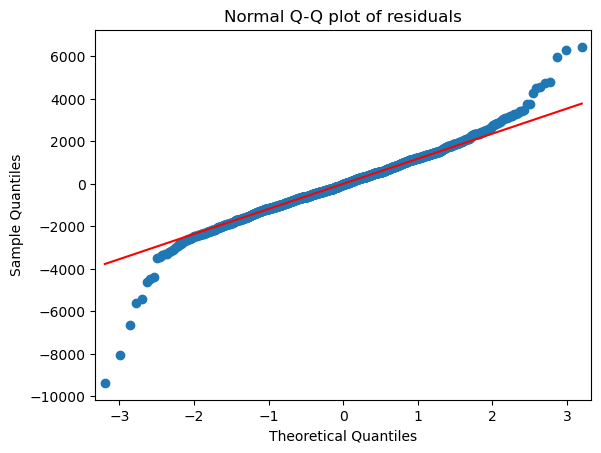

In [42]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [43]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [44]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

### Residual plot for Homoscedacity - Residual vs fitted(y^) plot

In [45]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

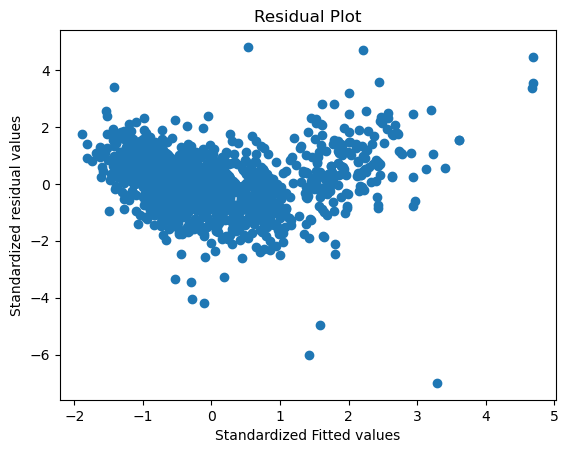

In [46]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual Vs Regressors

eval_env: 1


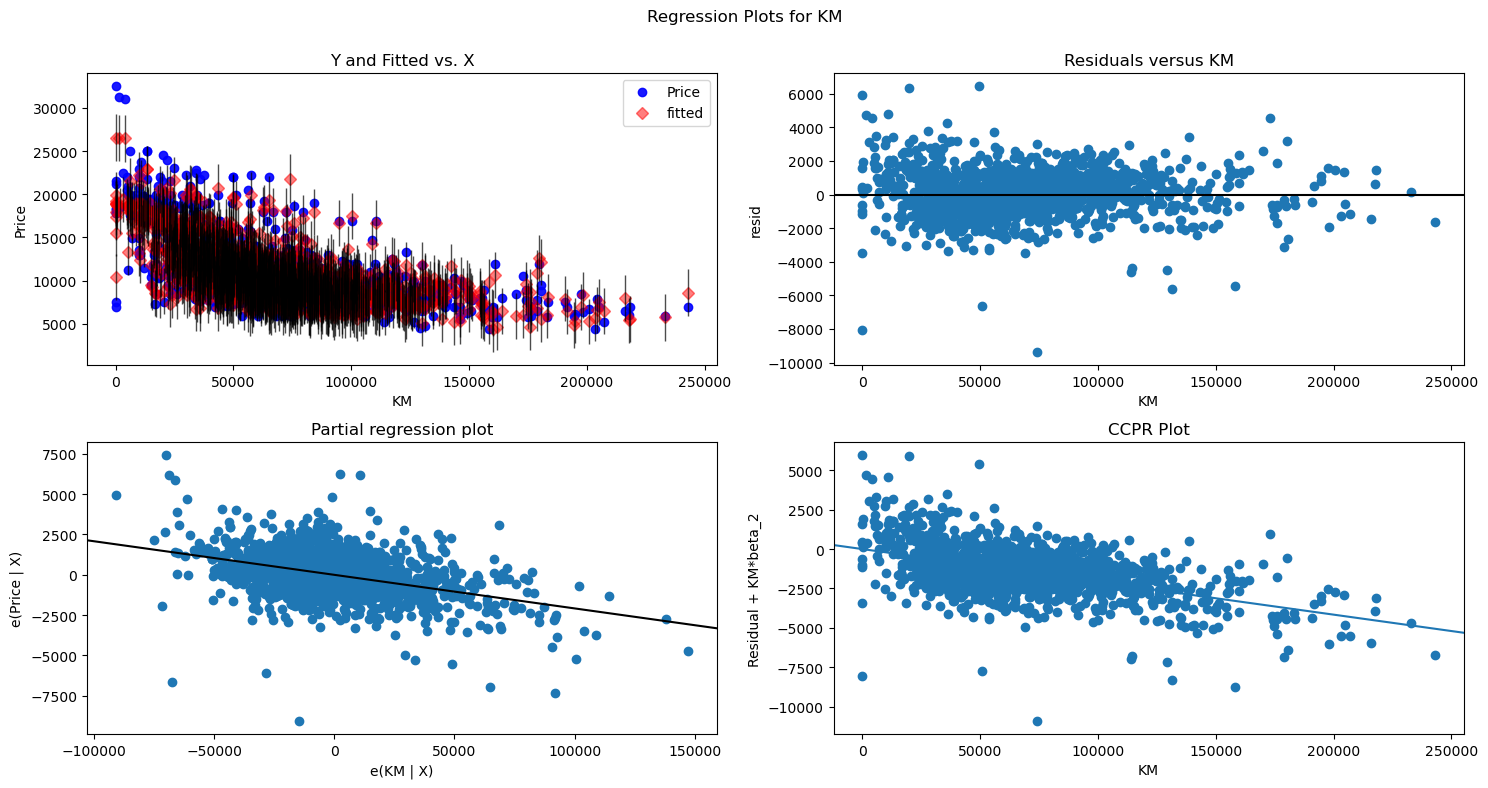

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


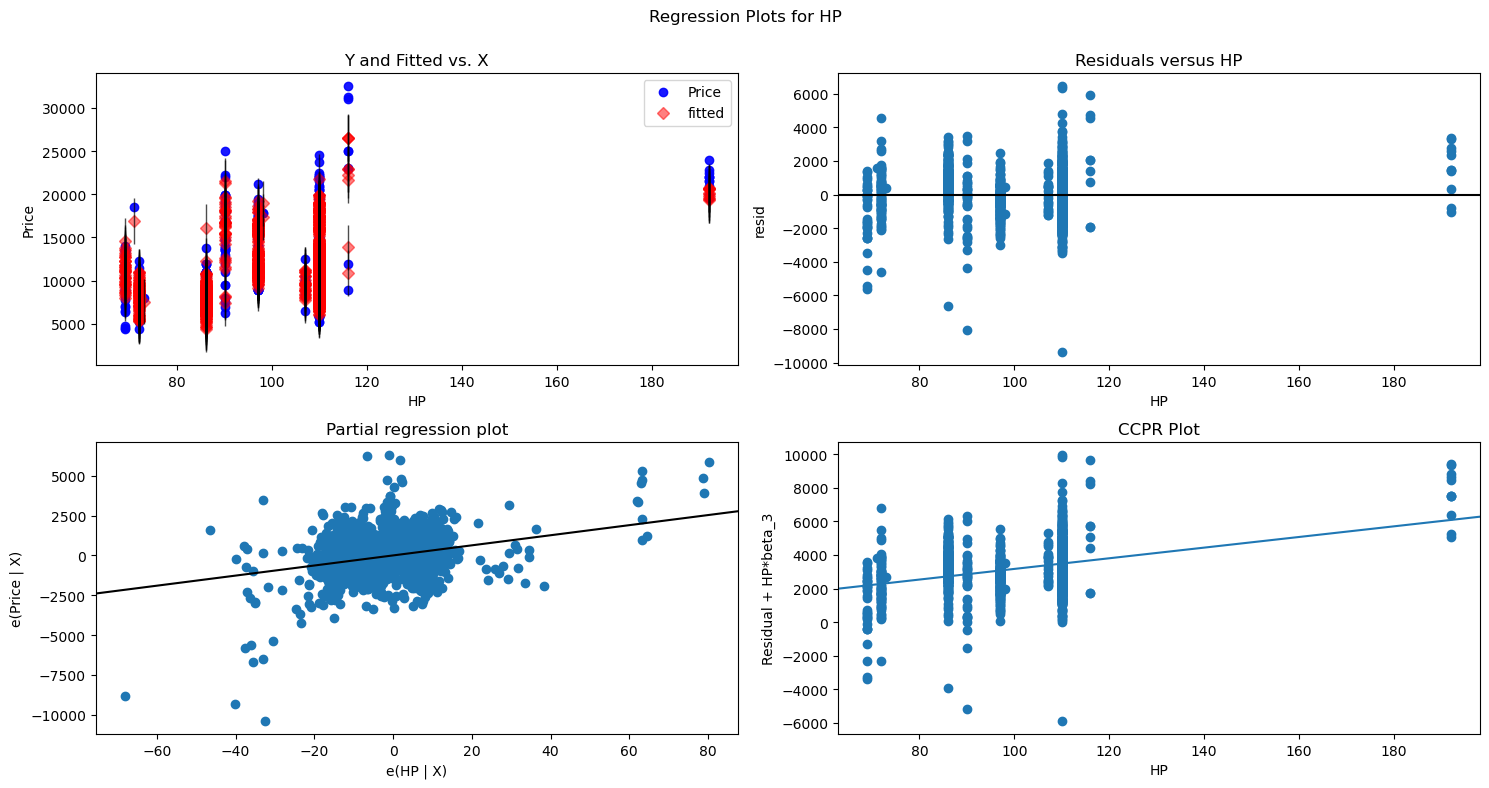

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


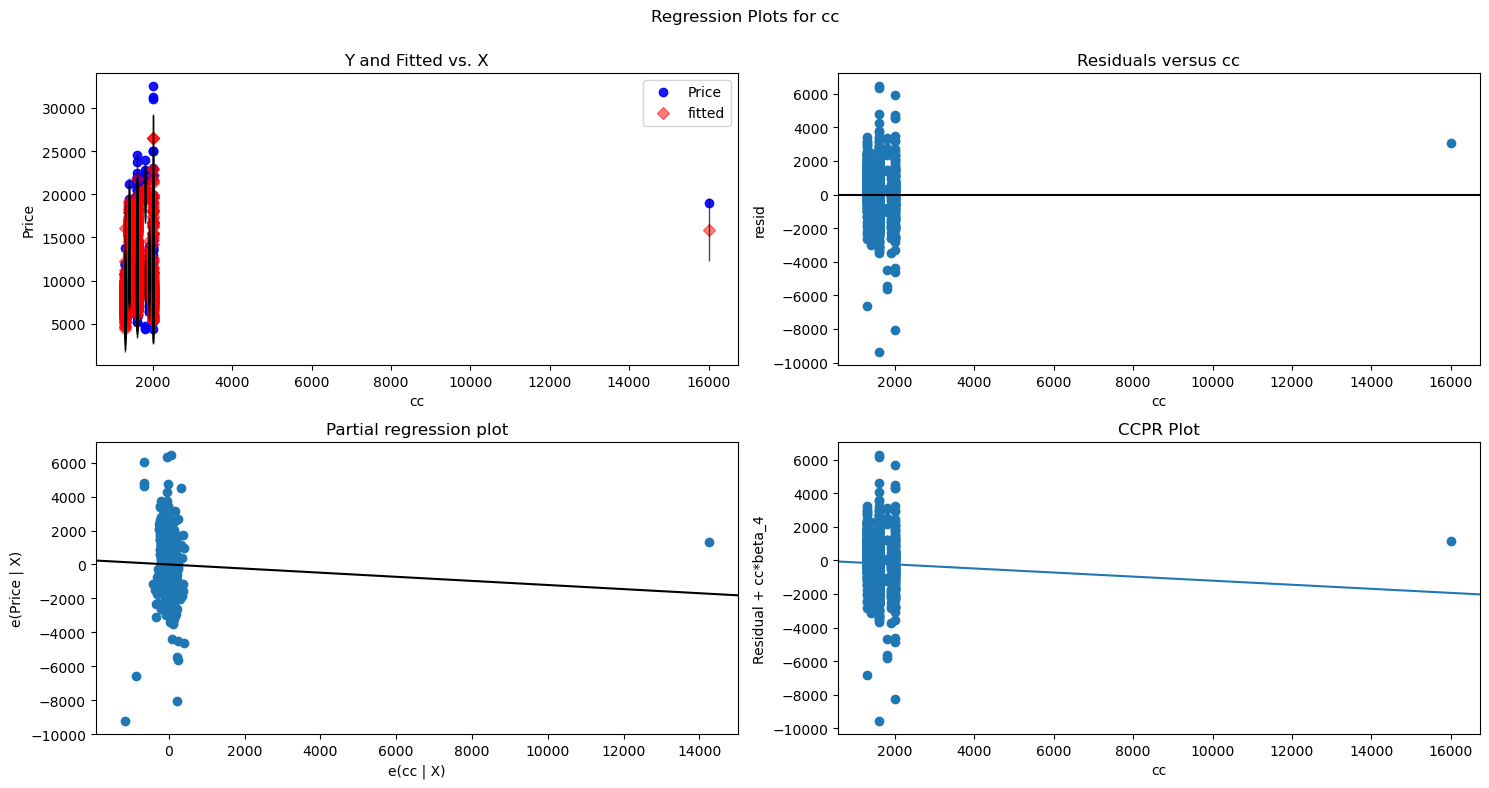

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


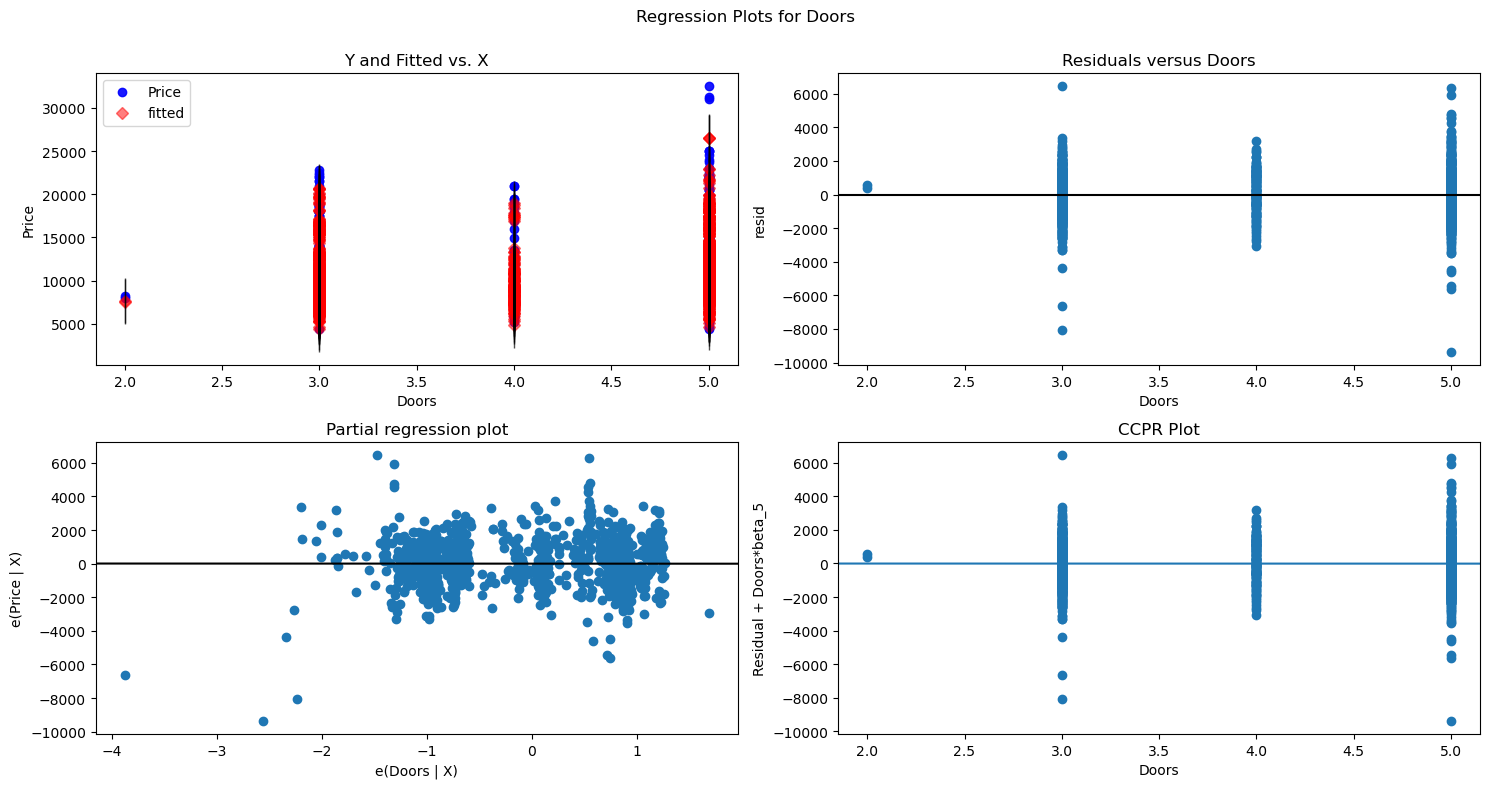

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


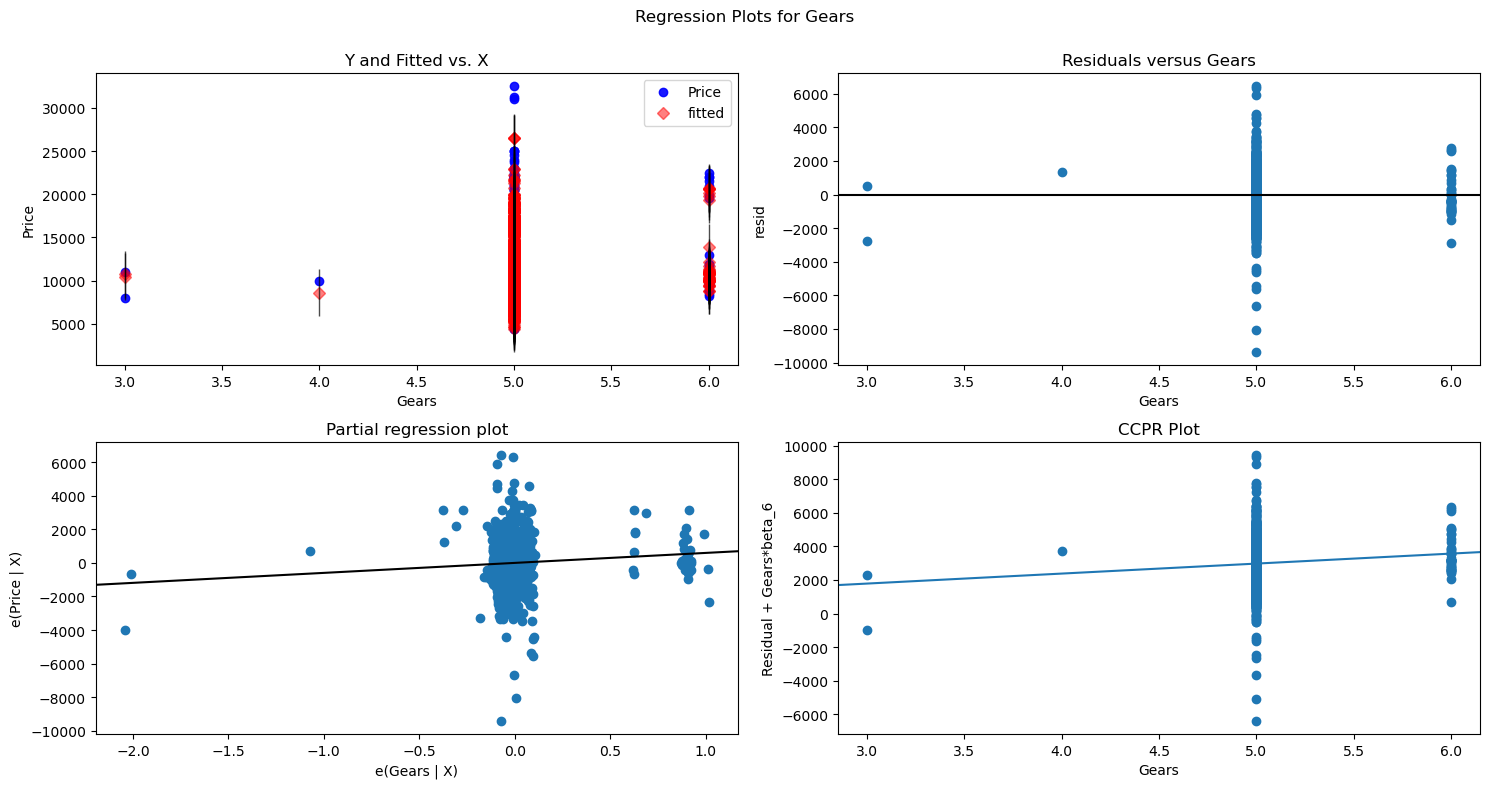

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


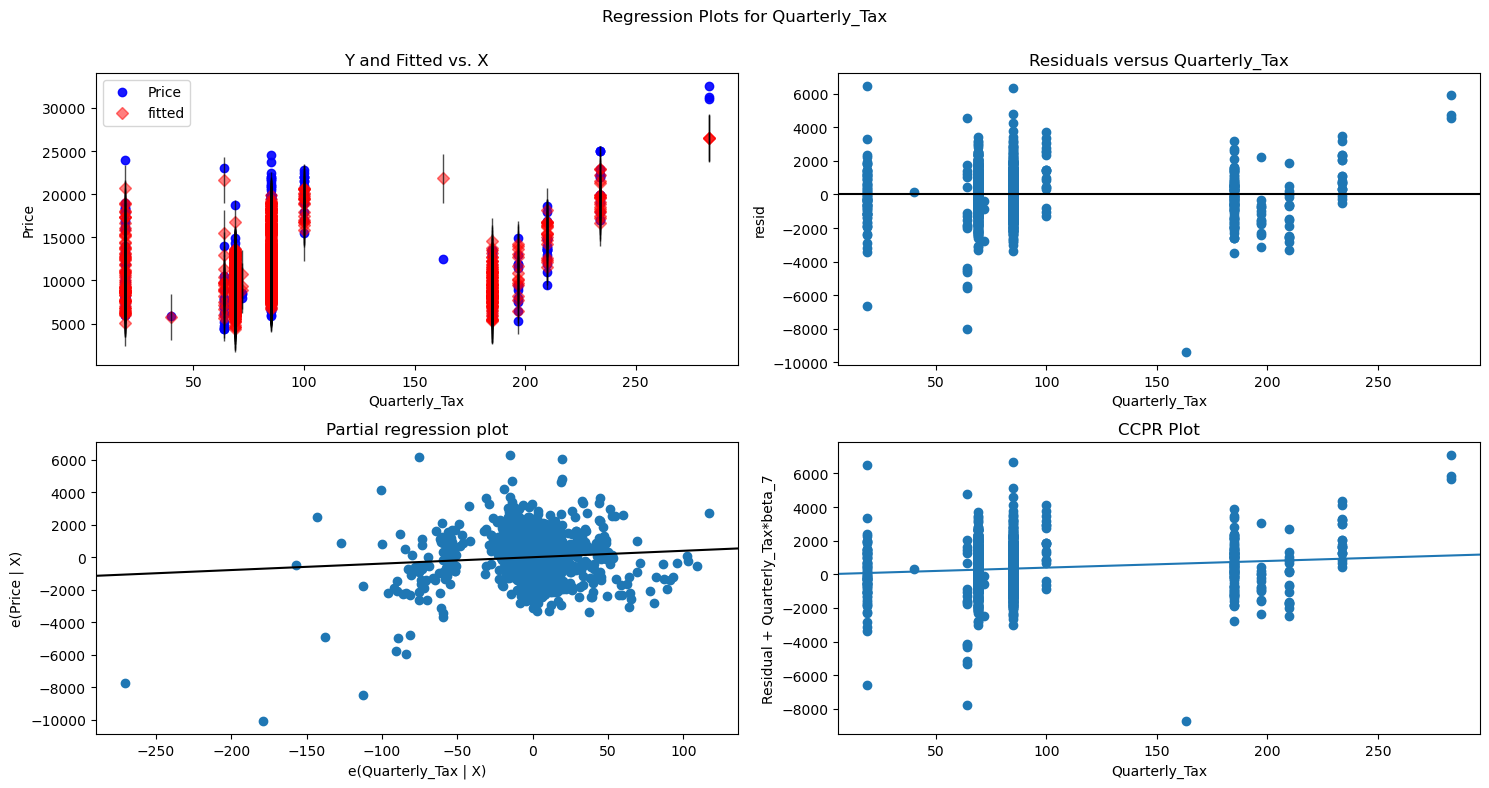

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


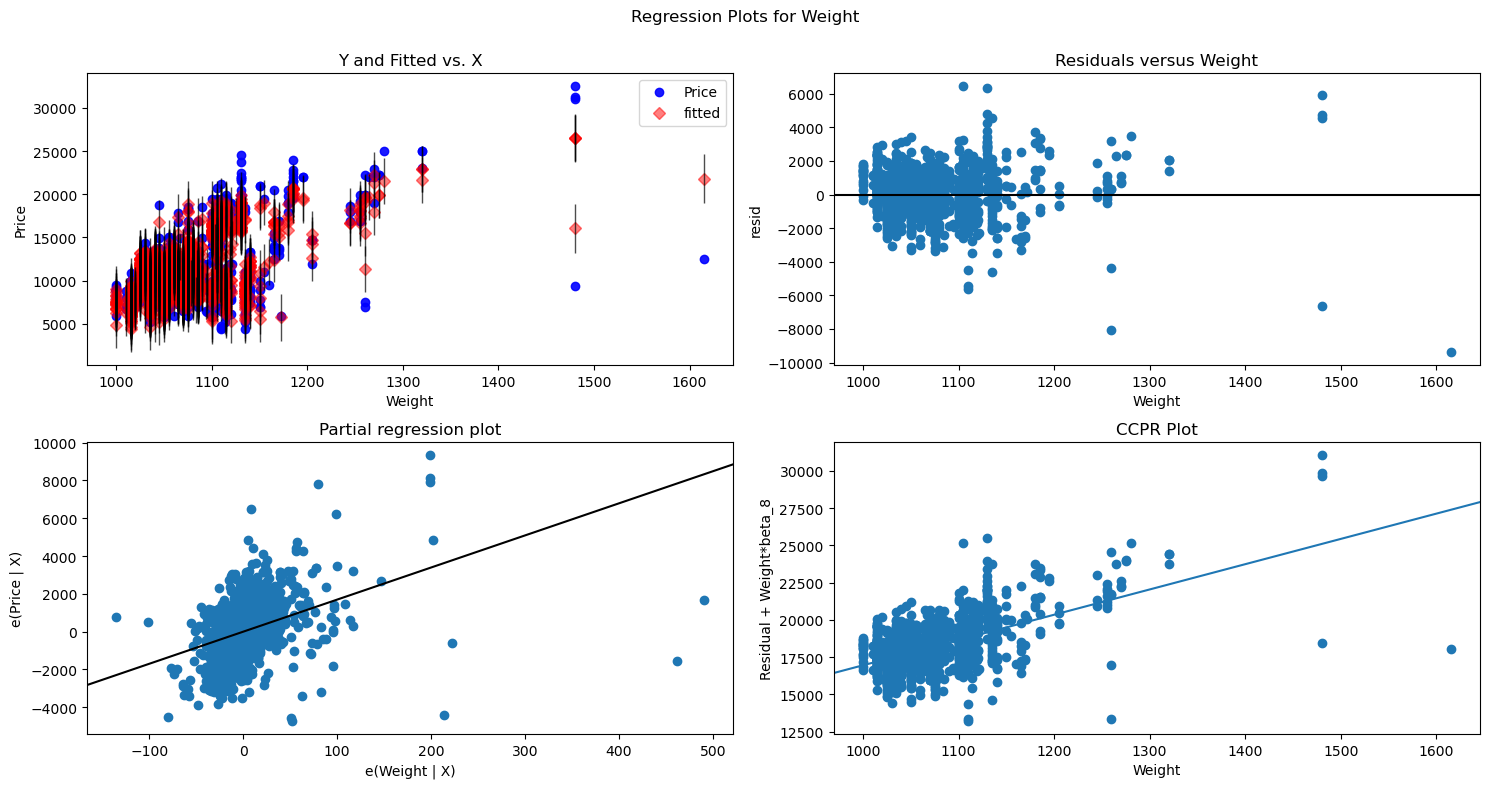

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [54]:
model.fittedvalues

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [55]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

## Model Deletion Diagnostics

### Detecting Influencers/Outliers

### Cook’s Distance

In [56]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

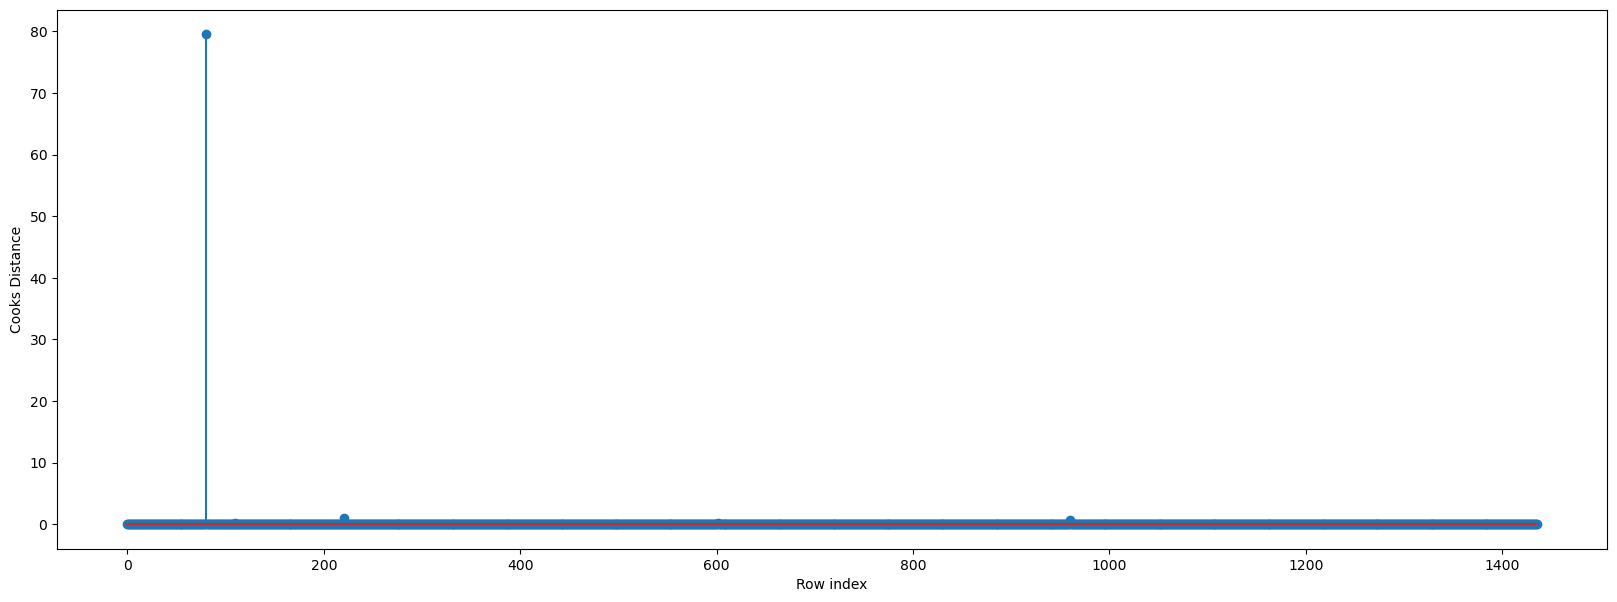

In [57]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_new)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [58]:
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

### High Influence points

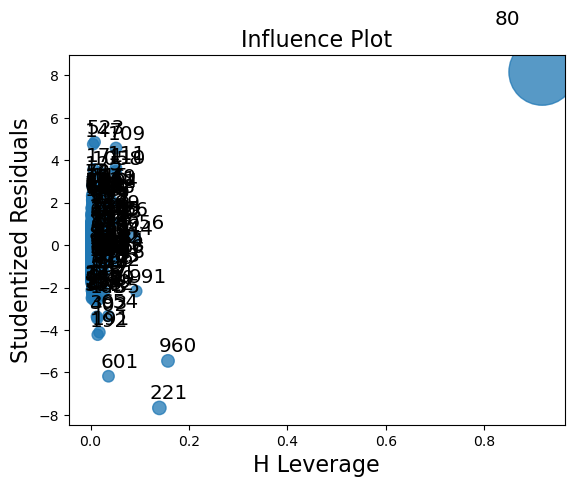

In [59]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [61]:
k = data_new.shape[1]
n = data_new.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [62]:
data_new[data_new.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [63]:
data_new.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Improving the model

In [103]:
Toyota_Corrolla=data_new.drop(data_new.index[[80]],axis=0).reset_index()
Toyota_Corrolla.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [104]:
Toyota_Corrolla=Toyota_Corrolla.drop(['index'],axis=1)

In [105]:
Toyota_Corrolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Build Model

In [106]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Toyota_Corrolla).fit()
model.pvalues

Intercept         5.319061e-06
Age_08_04        2.296010e-292
KM                5.564084e-42
HP                3.086498e-39
cc                5.827586e-16
Gears             3.725373e-03
Quarterly_Tax     2.473062e-10
Weight            5.723957e-69
dtype: float64

In [107]:
model.rsquared, model.rsquared_adj, model.aic

(0.8693349475698542, 0.8686939837527476, 24685.765438793034)

### Cooks Distance

In [108]:
model_influence_V = model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

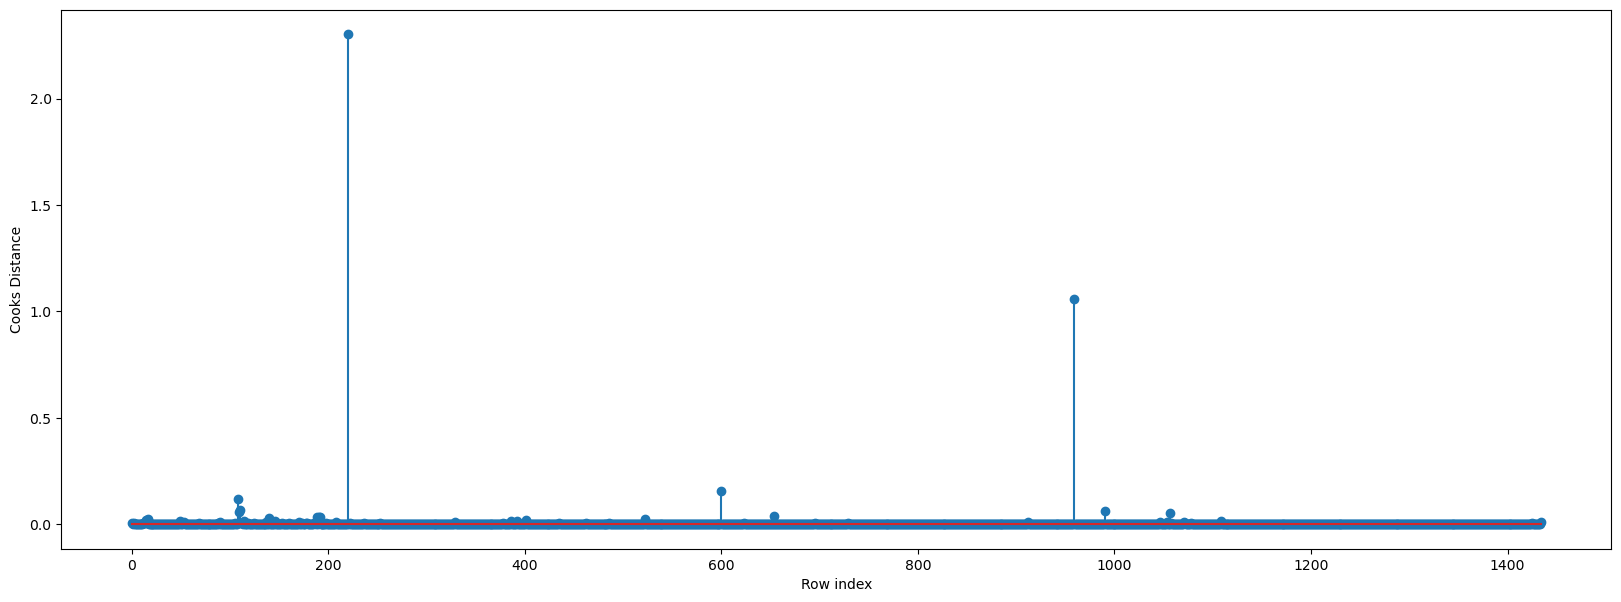

In [109]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyota_Corrolla)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [110]:
(np.argmax(c_V),np.max(c_V))

(220, 2.3034451664541025)

In [111]:
Toyota_Corrolla=Toyota_Corrolla.drop(Toyota_Corrolla.index[[220]],axis=0).reset_index()
Toyota_Corrolla=Toyota_Corrolla.drop(['index'],axis=1)
Toyota_Corrolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [112]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Toyota_Corrolla).fit()
model.pvalues

Intercept         3.545995e-13
Age_08_04        7.212480e-288
KM                3.210534e-42
HP                5.388789e-41
cc                2.120028e-24
Gears             2.874234e-03
Quarterly_Tax     6.784001e-09
Weight            5.543620e-89
dtype: float64

In [113]:
model_influence_V = model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

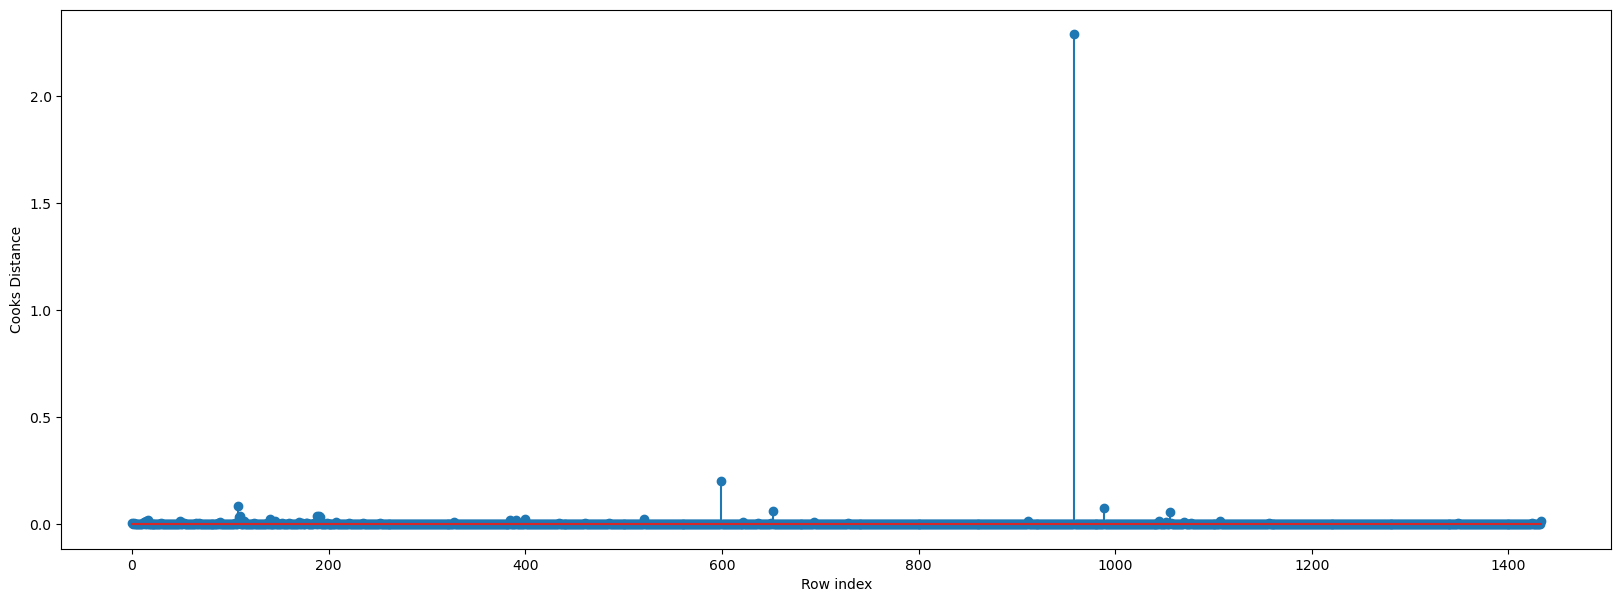

In [114]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyota_Corrolla)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [115]:
(np.argmax(c_V),np.max(c_V))

(958, 2.2907159163045674)

In [116]:
Toyota_Corrolla=Toyota_Corrolla.drop(Toyota_Corrolla.index[[958]],axis=0).reset_index()
Toyota_Corrolla=Toyota_Corrolla.drop(['index'],axis=1)
Toyota_Corrolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [117]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Toyota_Corrolla).fit()
model.pvalues

Intercept         3.334170e-23
Age_08_04        8.335503e-278
KM                1.340510e-43
HP                5.022290e-37
cc                1.263544e-32
Gears             1.175941e-03
Quarterly_Tax     5.765968e-05
Weight           3.182093e-106
dtype: float64

In [118]:
model_influence_V = model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

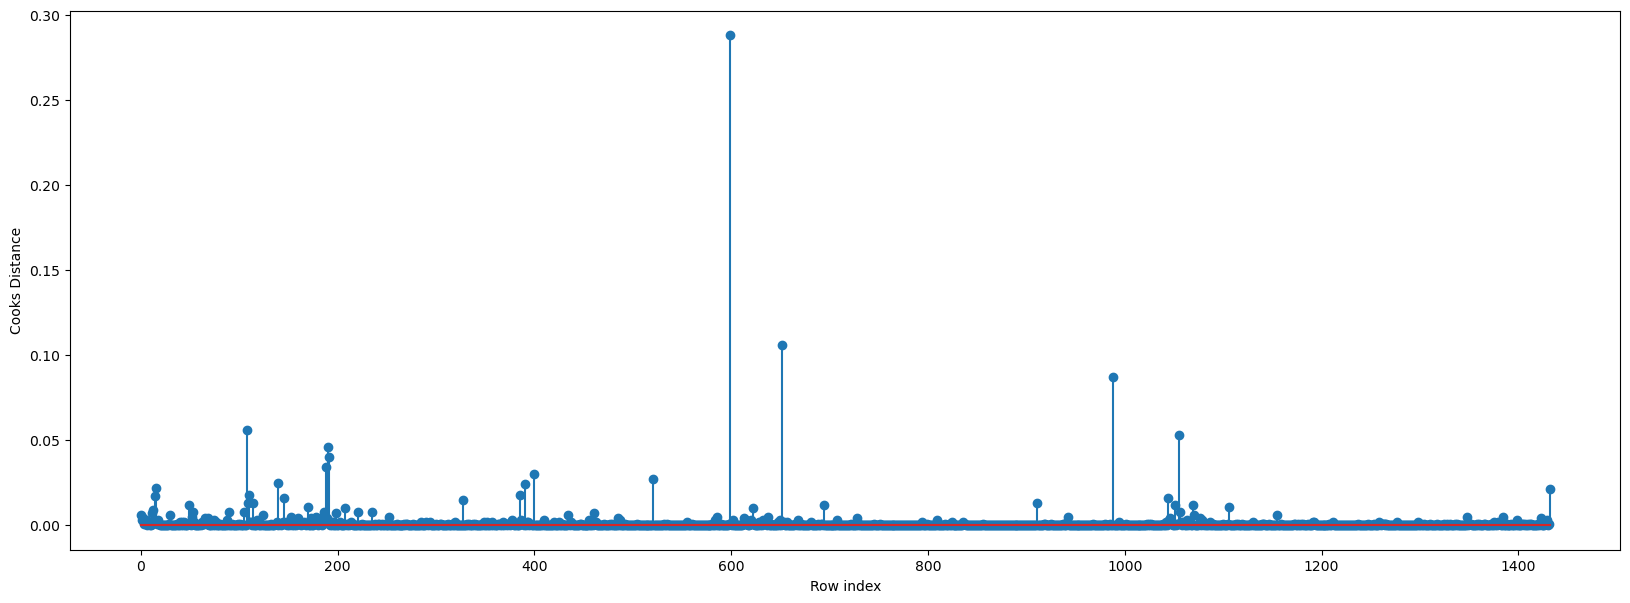

In [119]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyota_Corrolla)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [120]:
(model.rsquared,model.aic)

(0.8843226794628847, 24478.432455892536)

## Predicting for new data

In [121]:
new_data=pd.DataFrame({'Price':1500,'Age_08_04':21,'KM':40000,'HP':109,'cc':2200,'Gears':5,'Quarterly_Tax':210,'Weight':1270},index=[1])

In [122]:
model.predict(new_data)

1    19570.294741
dtype: float64